Eléonor KIOULOU

#Final Exam Deep Learning

In [ ]:
try:
# %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

## Exercice 1

Question 1

In [ ]:
from google.colab import files
files.upload()

In [ ]:
data = pd.read_csv("./A_ZHW.csv")

In [ ]:
data.shape

(372450, 785)

In [ ]:
data.tail(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
372440,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372441,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372442,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372443,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372444,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Question 2

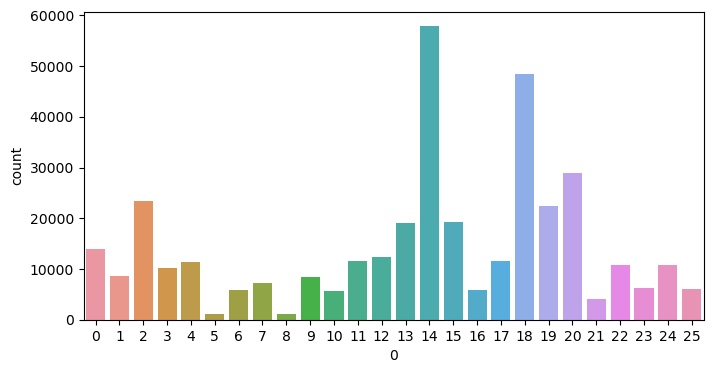

In [ ]:
import seaborn as sns

y_target = data.iloc[:, 0]
plt.figure(figsize=(8, 4))
sns.countplot(x=y_target)
plt.show()

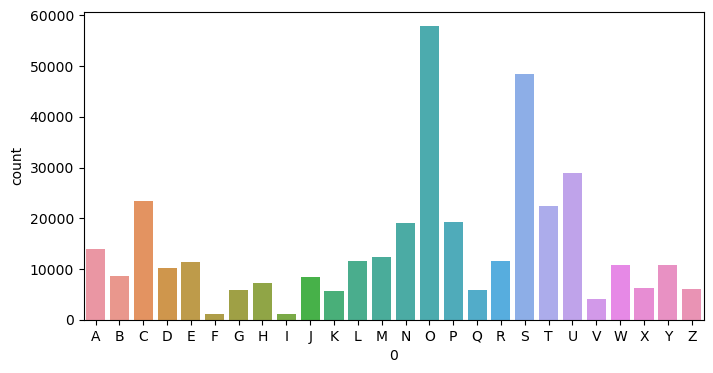

In [ ]:
# Replace the numeric values with their corresponding characters
y_label = y_target.replace(
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
    ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
)
plt.figure(figsize=(8, 4))
sns.countplot(x=y_label)
plt.show()

Question 3

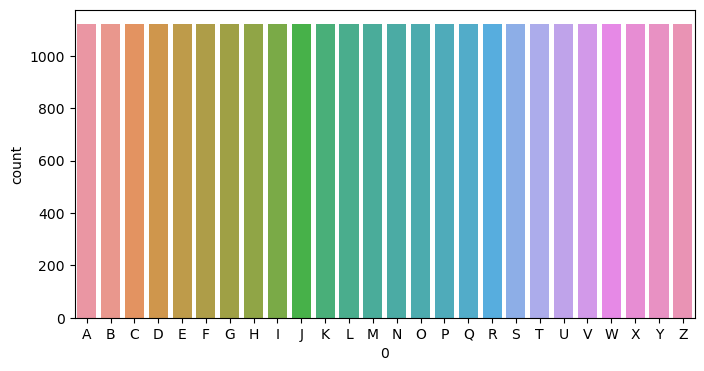

In [ ]:
from imblearn.under_sampling import NearMiss

data.drop(columns='0', inplace=True)

# Create a NearMiss object
missing = NearMiss()

# Resample the dataset using NearMiss
x_data, y_data = missing.fit_resample(data, y_target)

# Replace the numeric values with their corresponding characters
y_label = pd.Series(y_data).replace(
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
    ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
)

plt.figure(figsize=(8, 4))
sns.countplot(x=y_label)
plt.show()


## Exercice 2

Question 1

In [ ]:
y = np_utils.to_categorical(y_data, num_classes=26)

Question 2

In [ ]:
x_data_normalized = x_data / 255.0

In [ ]:
x_all = np.array(x_data)
x_all = x_all.reshape(-1,28,28,1)

Question 3

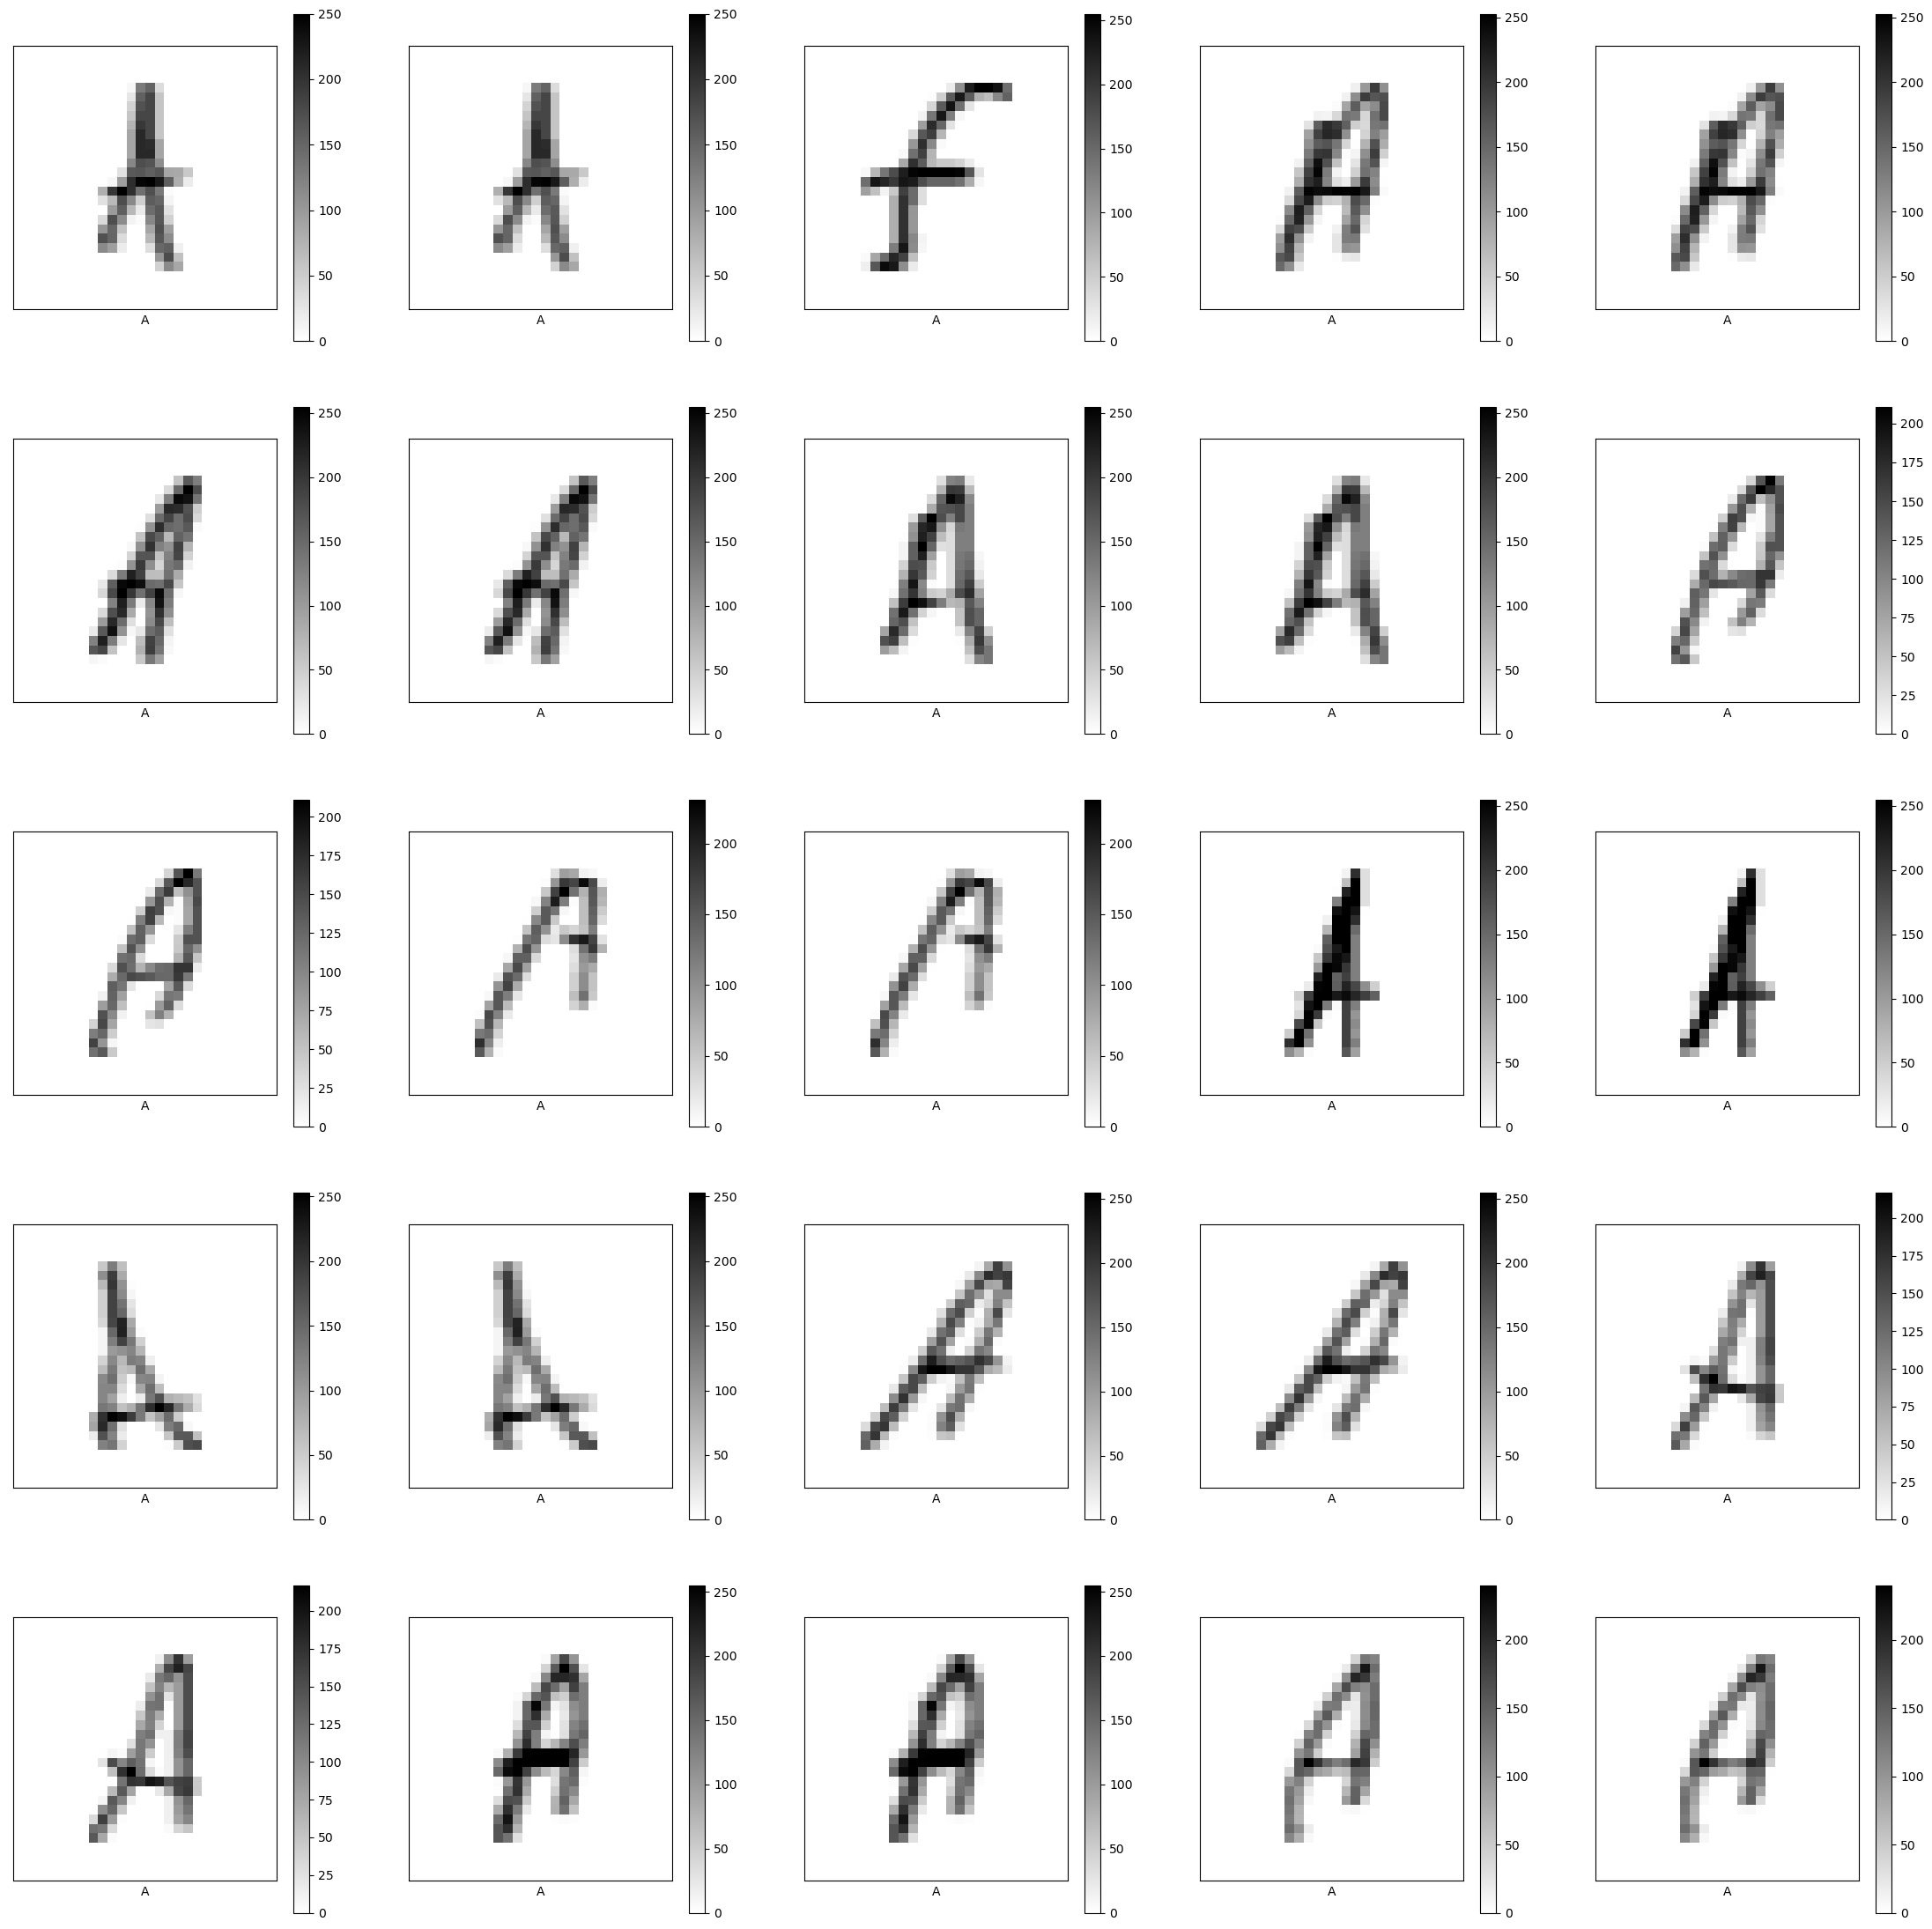

In [ ]:
def displayGridImages(nbImages, imageDataset, labels):
    plt.figure(figsize=(28, 28))
    for i in range(nbImages):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(imageDataset[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.colorbar()
        plt.xlabel(labels[i])
    plt.show()

displayGridImages(25, x_all, y_label)

Question 4

In [ ]:
rate = 0.2
rs = 100
x_train, x_test, y_train, y_test = train_test_split(x_all, y, test_size=rate ,random_state=rs, shuffle=True)

Question 5

In [ ]:
model1 = models.Sequential()

model1.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2), strides=2, padding='valid'))
model1.add(layers.Conv2D(64, (5, 5), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2), strides=2, padding='valid'))
model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(26, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          44864     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               1

Question 6

In [ ]:
model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])


Question 7

In [ ]:
validation_split = 0.25
batch_size = 128
epochs = 10

model1history = model1.fit(x_train, y_train,
                           validation_split=validation_split,
                           batch_size=batch_size,
                           epochs=epochs)


Epoch 1/10
137/137 [==============================] - 3s 18ms/step - loss: 2.9621 - accuracy: 0.6617 - val_loss: 0.4091 - val_accuracy: 0.8850
Epoch 2/10
137/137 [==============================] - 3s 19ms/step - loss: 0.2818 - accuracy: 0.9204 - val_loss: 0.2631 - val_accuracy: 0.9251
Epoch 3/10
137/137 [==============================] - 3s 19ms/step - loss: 0.1640 - accuracy: 0.9530 - val_loss: 0.1987 - val_accuracy: 0.9504
Epoch 4/10
137/137 [==============================] - 3s 22ms/step - loss: 0.1001 - accuracy: 0.9702 - val_loss: 0.1794 - val_accuracy: 0.9531
Epoch 5/10
137/137 [==============================] - 3s 19ms/step - loss: 0.0744 - accuracy: 0.9773 - val_loss: 0.1690 - val_accuracy: 0.9572
Epoch 6/10
137/137 [==============================] - 3s 19ms/step - loss: 0.0571 - accuracy: 0.9809 - val_loss: 0.1801 - val_accuracy: 0.9574
Epoch 7/10
137/137 [==============================] - 3s 18ms/step - loss: 0.0385 - accuracy: 0.9892 - val_loss: 0.1548 - val_accuracy: 0.9672

Question 8

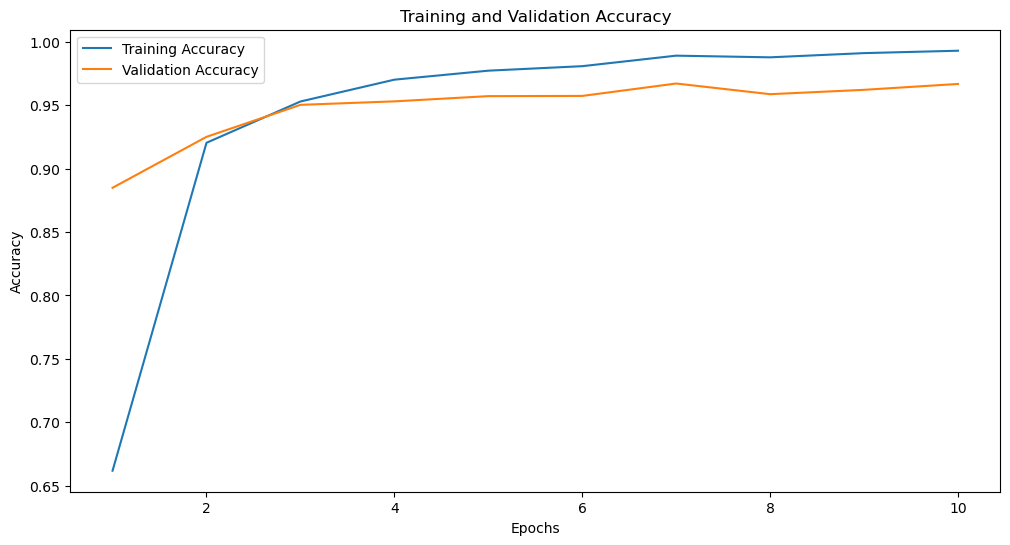

In [ ]:

training_accuracy = model1history.history['accuracy']
validation_accuracy = model1history.history['val_accuracy']

epochs_range = range(1, len(training_accuracy) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


Question 9

In [ ]:
test_loss, test_accuracy = model1.evaluate(x_test, y_test)

print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")


182/182 [==============================] - 0s 3ms/step - loss: 0.1554 - accuracy: 0.9720
Test loss: 0.1554
Test accuracy: 0.9720


The test loss value of 0.1554 indicates that the model's predictions are, on average, very close to the actual values in the test set. Lower test loss values typically indicate better model performance.

The test accuracy value of 0.9720 suggests that the model is able to correctly predict the class for nearly 97% of the test samples. This is also a very good performance metric, indicating that the model is highly accurate in its predictions.

Question 10

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model2 = Sequential([
    Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 64)          44864     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

validation_split = 0.25
batch_size = 128
epochs = 10

model2history = model2.fit(x_train, y_train,
                           validation_split=validation_split,
                           batch_size=batch_size,
                           epochs=epochs)


Epoch 1/10
137/137 [==============================] - 3s 18ms/step - loss: 3.3636 - accuracy: 0.1944 - val_loss: 1.6389 - val_accuracy: 0.5482
Epoch 2/10
137/137 [==============================] - 2s 17ms/step - loss: 1.7755 - accuracy: 0.4398 - val_loss: 0.6816 - val_accuracy: 0.8310
Epoch 3/10
137/137 [==============================] - 2s 18ms/step - loss: 1.2229 - accuracy: 0.6101 - val_loss: 0.3858 - val_accuracy: 0.9004
Epoch 4/10
137/137 [==============================] - 3s 19ms/step - loss: 0.8937 - accuracy: 0.7164 - val_loss: 0.3103 - val_accuracy: 0.9133
Epoch 5/10
137/137 [==============================] - 2s 18ms/step - loss: 0.6685 - accuracy: 0.7887 - val_loss: 0.2173 - val_accuracy: 0.9394
Epoch 6/10
137/137 [==============================] - 3s 19ms/step - loss: 0.5484 - accuracy: 0.8257 - val_loss: 0.1977 - val_accuracy: 0.9469
Epoch 7/10
137/137 [==============================] - 3s 21ms/step - loss: 0.4266 - accuracy: 0.8650 - val_loss: 0.1593 - val_accuracy: 0.9571

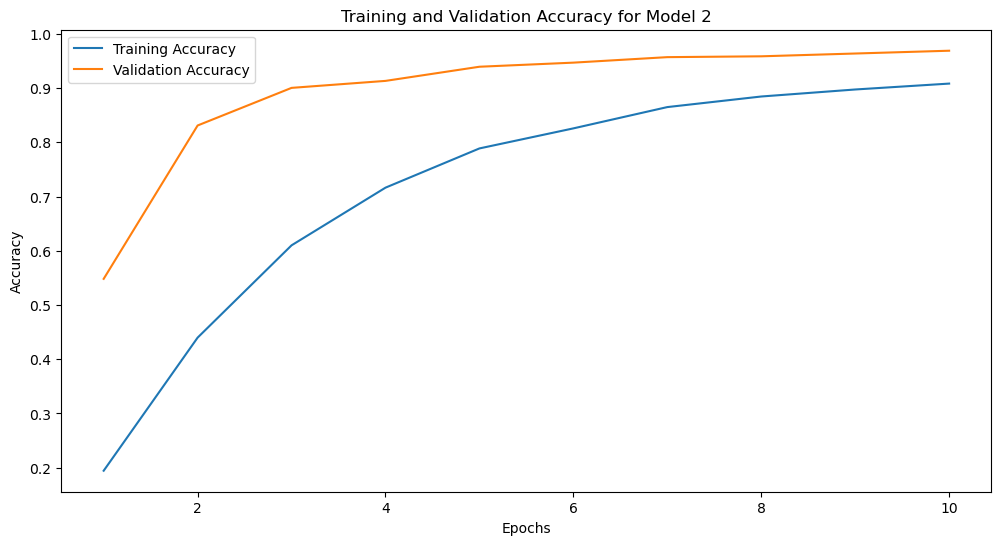

In [ ]:
training_accuracy = model2history.history['accuracy']
validation_accuracy = model2history.history['val_accuracy']

epochs_range = range(1, len(training_accuracy) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Model 2')
plt.legend()

plt.show()

In [ ]:
y_pred = model2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

182/182 [==============================] - 0s 2ms/step


In [ ]:
test_loss_model1, test_accuracy_model1 = model1.evaluate(x_test, y_test)
test_loss_model2, test_accuracy_model2 = model2.evaluate(x_test, y_test)

print(f"Model 1 - Test loss: {test_loss_model1:.4f}, Test accuracy: {test_accuracy_model1:.4f}")
print(f"Model 2 - Test loss: {test_loss_model2:.4f}, Test accuracy: {test_accuracy_model2:.4f}")

182/182 [==============================] - 1s 3ms/step - loss: 0.1156 - accuracy: 0.9691
Model 1 - Test loss: 0.1554, Test accuracy: 0.9720
Model 2 - Test loss: 0.1156, Test accuracy: 0.9691


In terms of test loss, Model 2 outperforms Model 1 with a score of 0.1156 compared to 0.1554, indicating that it is better at predicting target values. Model 1 has a higher test accuracy of 0.9720 compared to Model 2's 0.9691, but the difference in accuracy is not significant. Overall, based on the lower test loss, Model 2 may have a slight advantage in predicting target values compared to Model 1.

Question 11

In [ ]:
model3 = Sequential([
    Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    Dropout(0.5),
    Conv2D(32, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(1, 1), strides=2, padding='valid'),
    Dropout(0.5),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1, 1), strides=2, padding='valid'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

validation_split = 0.25
batch_size = 128
epochs = 10

model3history = model3.fit(x_train, y_train,
                           validation_split=validation_split,
                           batch_size=batch_size,
                           epochs=epochs)


Epoch 1/10
137/137 [==============================] - 4s 25ms/step - loss: 3.4168 - accuracy: 0.0934 - val_loss: 2.6558 - val_accuracy: 0.2694
Epoch 2/10
137/137 [==============================] - 3s 24ms/step - loss: 2.4889 - accuracy: 0.2382 - val_loss: 1.7730 - val_accuracy: 0.4744
Epoch 3/10
137/137 [==============================] - 3s 25ms/step - loss: 1.9637 - accuracy: 0.3947 - val_loss: 1.1508 - val_accuracy: 0.6997
Epoch 4/10
137/137 [==============================] - 3s 24ms/step - loss: 1.4665 - accuracy: 0.5438 - val_loss: 0.6931 - val_accuracy: 0.8178
Epoch 5/10
137/137 [==============================] - 3s 23ms/step - loss: 1.0992 - accuracy: 0.6636 - val_loss: 0.4999 - val_accuracy: 0.8640
Epoch 6/10
137/137 [==============================] - 3s 23ms/step - loss: 0.8600 - accuracy: 0.7394 - val_loss: 0.3599 - val_accuracy: 0.8977
Epoch 7/10
137/137 [==============================] - 3s 24ms/step - loss: 0.6898 - accuracy: 0.7895 - val_loss: 0.2840 - val_accuracy: 0.9178

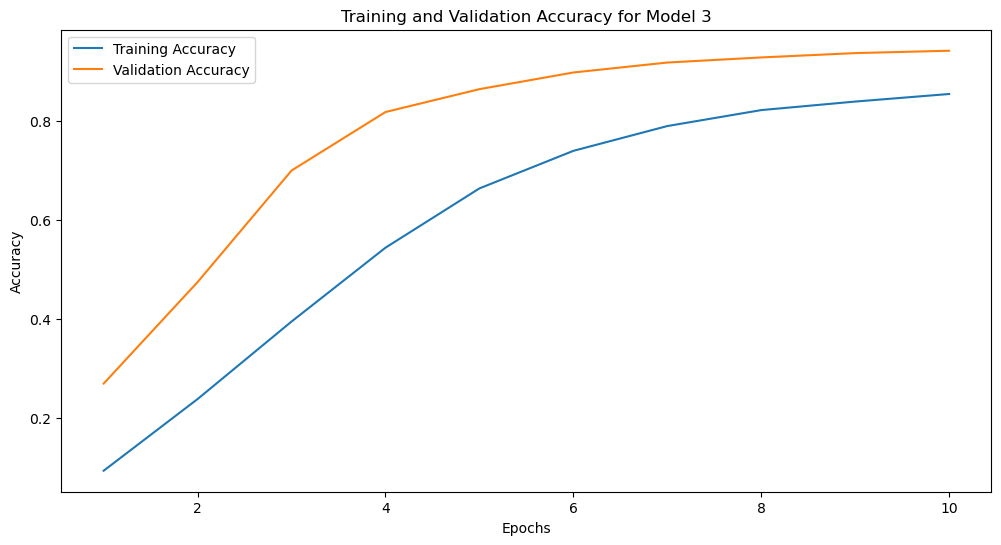

In [ ]:
training_accuracy = model3history.history['accuracy']
validation_accuracy = model3history.history['val_accuracy']

epochs_range = range(1, len(training_accuracy) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Model 3')
plt.legend()

plt.show()


In [ ]:
y_pred = model3.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

182/182 [==============================] - 1s 3ms/step


In [ ]:
test_loss_model3, test_accuracy_model3 = model3.evaluate(x_test, y_test)

print(f"Model 1 - Test loss: {test_loss_model1:.4f}, Test accuracy: {test_accuracy_model1:.4f}")
print(f"Model 2 - Test loss: {test_loss_model2:.4f}, Test accuracy: {test_accuracy_model2:.4f}")
print(f"Model 3 - Test loss: {test_loss_model3:.4f}, Test accuracy: {test_accuracy_model3:.4f}")


182/182 [==============================] - 1s 3ms/step - loss: 0.2040 - accuracy: 0.9444
Model 1 - Test loss: 0.1554, Test accuracy: 0.9720
Model 2 - Test loss: 0.1156, Test accuracy: 0.9691
Model 3 - Test loss: 0.2040, Test accuracy: 0.9444


Model 2 has the lowest test loss, indicating the best performance in predicting target values. However, Model 1 has the highest test accuracy of 0.9720, followed by Model 2 at 0.9691, and Model 3 at 0.9444. The difference in test accuracy between the three models is not statistically significant. Overall, Model 1 and Model 2 are similarly performing well, with Model 1 having a slightly higher accuracy and Model 2 having a slightly lower loss. Model 3 has lower performance based on both loss and accuracy compared to the other two models.

Question 12

Model 1 achieved the highest test accuracy among the three models, followed by Model 2 and then Model 3. Additionally, Model 1 exhibits the smallest gap between the test and validation curves, indicating better generalization performance.

To further reduce overfitting, several strategies can be implemented, such as data augmentation by applying random transformations to the training data, adding L1 or L2 regularization to the convolutional and dense layers, implementing early stopping in the training process, and tuning hyperparameters such as the number of layers, number of filters, activation functions, and learning rates to find the optimal combination that reduces overfitting while maintaining good performance.